##### XOR Experiment

In [1]:
import numpy as np

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

In [3]:
X.shape

(4, 2)

In [4]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [5]:
#Least Squares
model_LS = RidgeClassifier()
model_LS.fit(X,y)
model_LS.predict(X)

array([0, 0, 0, 0])

In [6]:
model_LS.score(X,y)

0.5

In [7]:
# Logistic Regression
model_LR = LogisticRegression()
model_LR.fit(X,y)
model_LR.predict(X)

array([0, 0, 0, 0])

In [8]:
model_LR.score(X,y)

0.5

In [9]:
import tensorflow.keras as keras

2022-10-14 15:09:45.739299: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [22]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14384522740990678221
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6880471296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15212719197573685498
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:07:00.0, compute capability: 8.6"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 6909425088
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13698744068038043095
physical_device_desc: "device: 1, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
]


2022-10-14 15:24:52.640026: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-14 15:24:52.640758: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-14 15:24:52.640786: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: NVIDIA GeForce RTX 3070 computeCapability: 8.6
coreClock: 1.77GHz coreCount: 46 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2022-10-14 15:24:52.641169: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-14 15:24:52.641185: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ##DNN layers

In [16]:
model_DNN = Sequential()
model_DNN.add(Dense(10, activation='relu')) ## hidden layer
model_DNN.add(Dense(1, activation='sigmoid')) ## output layer

In [19]:
# compiler
# optimizer = SGD (stochastic Gradient Decent, adaptive momentum, mini-batch )
model_DNN.compile(optimizer="adam", loss='binary_crossentropy', metrics=['acc'])
# metric -> 지속적으로 관찰해야 하는 값들

In [20]:
# trainig
model_DNN.fit(X,y, epochs= 1000, verbose=0) ## 각 줄 다 온다

2022-10-14 15:22:04.411454: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-14 15:22:04.415751: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3399995000 Hz
2022-10-14 15:22:04.728113: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


In [21]:
model_DNN.evaluate(X,y)

1/1 [==============================] - 0s 206ms/step - loss: 0.2024 - acc: 1.0000


[0.20243412256240845, 1.0]

##### MNIST EXPERIENT

In [53]:
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'


with tf.Graph().as_default():
        gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)

In [27]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [57]:
from sklearn.model_selection import train_test_split
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train.shape


(60000, 28, 28)

In [60]:
X_train.shape
X_test.shape

(10000, 28, 28)

In [46]:
X_train = X_train.reshape(-1,28,28,1)/255.
X_test = X_test.reshape(-1,28,28,1)/255.

In [61]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

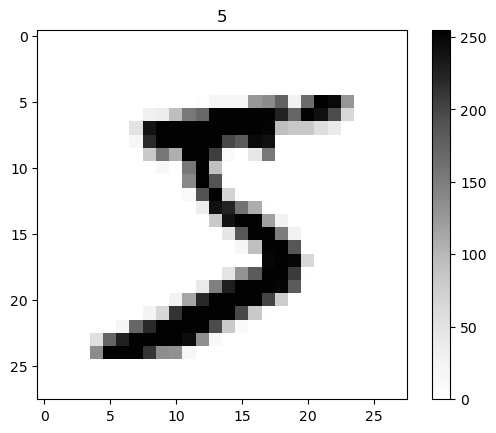

In [62]:
plt.figure()
plt.imshow(X_train[0], cmap='Greys')
plt.colorbar()
plt.title(y_train[0]) ## label
plt.show()

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten

In [49]:
model_DNN_MNIST = Sequential()
model_DNN_MNIST.add(Flatten(input_shape=(28,28)))
model_DNN_MNIST.add(Dense(128, activation='relu')) #hidden layer
model_DNN_MNIST.add(Dense(10, activation='softmax')) #output layer (0~9)

In [50]:
model_DNN_MNIST.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [66]:
print("GPU를 사용한 학습")
with tf.device("/device:GPU:1"):
	history = model_DNN_MNIST.fit(X_train, y_train, epochs=50, verbose=1)
	history

GPU를 사용한 학습
Epoch 1/50
1875/1875 [==============================] - 16s 9ms/step - loss: 2.2422 - acc: 0.1420
Epoch 2/50
1875/1875 [==============================] - 16s 8ms/step - loss: 2.2690 - acc: 0.1291
Epoch 3/50
1875/1875 [==============================] - 15s 8ms/step - loss: 2.2717 - acc: 0.1280
Epoch 4/50
1875/1875 [==============================] - 16s 8ms/step - loss: 2.2013 - acc: 0.1616
Epoch 5/50
1875/1875 [==============================] - 16s 8ms/step - loss: 2.3043 - acc: 0.1124
Epoch 6/50
1875/1875 [==============================] - 16s 8ms/step - loss: 2.3013 - acc: 0.1124
Epoch 7/50
1875/1875 [==============================] - 16s 8ms/step - loss: 2.3012 - acc: 0.1124
Epoch 8/50
1875/1875 [==============================] - 16s 8ms/step - loss: 2.3012 - acc: 0.1124
Epoch 9/50
1875/1875 [==============================] - 16s 9ms/step - loss: 2.3012 - acc: 0.1124
Epoch 10/50
1875/1875 [==============================] - 16s 9ms/step - loss: 2.3012 - acc: 0.1124
Epoch 1

KeyboardInterrupt: 

In [64]:
model_DNN_MNIST.predict(X_test[0]).argmax(1)

ValueError: in user code:

    /home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/tensorflow/python/keras/engine/functional.py:424 call
        return self._run_internal_graph(
    /home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/tensorflow/python/keras/engine/functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_3 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 28)


In [65]:
model_DNN_MNIST.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.1189 - acc: 0.1972


[2.1188769340515137, 0.1972000002861023]

In [68]:
X_test.shape

(10000, 28, 28)

In [71]:
X_train_LR = X_train.reshape((60000,-1))
X_test_LR = X_test.reshape((10000,-1))
X_train_LR.shape

(60000, 784)

In [72]:
model_LR_MNIST = LogisticRegression()
model_LR_MNIST.fit(X_train_LR,y_train)

/home/hojun/miniconda3/envs/tensor/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
model_LR_MNIST.predict(X_test_LR)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [76]:
model_LR_MNIST.score(X_test_LR,y_test)

0.9255

In [78]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1' ## 초기화할 GPU number

with tf.Graph().as_default():
	# GPU 메모리를 전부 할당하지 않고, 아주 적은 비율만 할당되어 시작됨. 프로세스의 메모리 수요에 따라 자동적으로 증가
	# 단, GPU 메모리를 처음부터 전체 비율을 사용하지 않음
	gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)